**_Autor_**: Rubén del Mazo Rodríguez

# Aplicación de una red neuronal profunda: Clasificación de imágenes

En este archivo se entrenarán las dos redes neuronales que fueron creadas en el archivo "Red_Neuronal_Profunda_paso_a_paso.ipynb" con el conjunto de imágenes que fueron utilizadas en el archivo de la regresión logística. 

**Puntos principales**:

- Comprobar que una red neuronal funciona mejor en este problema de aprendizaje supervisado que los métodos de aprendizaje clásicos. 
- Comparar el rendimiento de la propia red neuronal en función del número de capas, L.

## Contenidos
- [1 - Librerías](#1)
- [2 - Descripción y procesamiento de los datos](#2)
- [3 - Metodología general para modelos de redes neuronales](#3)
- [4 - Modelo de red neuronal de dos capas (una capa oculta)](#4)
    - [4.1 - Arquitectura del modelo](#4-1)
    - [4.2 - Construcción del modelo](#4-2)
    - [4.3 - Entrenamiento del modelo y predicción de resultados](#4-3)
    - [4.4 - Análisis de los resultados](#4-4)
- [5 - Modelo de red neuronal con L capas (L-1 capas ocultas)](#5)
    - [5.1 - Arquitectura del modelo](#5-1)
    - [5.2 - Construcción del modelo](#5-2)
    - [5.3 - Entrenamiento del modelo y predicción de resultados](#5-3)
    - [5.4 - Análisis de los resultados](#5-4)
- [6 - Comentarios finales (decir que no se buscaba optimizar, que eso es otro tema, mencionar cosas que se pueden hacer para optimizar, plantearme si buscar en internet algo que lo optimice, etc)](#6)

<a name='1'></a>
## 1 - Librerías

En primer lugar, importamos y ejecutamos las librerías necesarias:

- [numpy](https://numpy.org/doc/1.24/) es el paquete fundamental para la computación científica con Python.
- [h5py](http://www.h5py.org) es un paquete comúnmente utilziado para interactuar con datos almacenados en archivos H5.
- [matplotlib](http://matplotlib.org) es la librería más famosa para dibujar gráficos en python.
- [sklearn](https://scikit-learn.org/stable/) es una biblioteca para aprendizaje automático de software libre.
- `funciones_redes_neuronales` es el .py donde están las funciones implementadas en _Red\_Neuronal\_Profunda\_paso\_a\_paso.ipynb_.
- `np.random.seed(1)` se utiliza para mantener la coherencia de todas las llamadas a funciones aleatorias. Ya se ha hablado sobre ello en archivos anteriores.

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from funciones_redes_neuronales import *

np.random.seed(1)

<a name='2'></a>
## 2 - Descripción y procesamiento de los datos

Se utilizará el mismo set de datos que en el archivo "Regresion_Logistica_como_Red_Neuronal.ipynb". En dicho modelo de aprendizaje supervisado clásico (aunque estructurado como una red neuronal) se alcanzó un 70% de precisión (_accuracy_) en el conjunto test. En este archivo se mejoraran los resultados gracias a las redes neuronales.

Recordemos los datos del problema:
- conjunto de entrenamiento, `m_train`, de 209 imágenes etiquetadas con 1 (si es un gato) o 0 (si no es un gato).
- conjunto de test, `m_test`, de 50 imágenes etiquetadas con 1 (si es un gato) o 0 (si no es un gato).
- cada imagen tiene dimensiones `(num_px, num_px, 3)`, donde 3 indica los tres canales RGB.

In [2]:
# Cargamos los datos (como es la misma funcion que en el archivo de regresion, no se repite su codigo en este archivo)
train_set_x_orig, train_y, test_set_x_orig, test_y, clases = cargar_dataset()

In [3]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print("Número de ejemplos de entrenamiento: m_train = " + str(m_train))
print("Número de ejemplos de prueba: m_test = " + str(m_test))
print("Altura/Anchura de cada imagen: num_px = " + str(num_px))
print("Dimensiones de cada imagen: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print("Dimensiones de train_set_x_orig: " + str(train_set_x_orig.shape))
print("Dimensiones de train_y: " + str(train_y.shape))
print("Dimensiones de test_set_x_orig: " + str(test_set_x_orig.shape))
print("Dimensiones de test_y: " + str(test_y.shape))

Número de ejemplos de entrenamiento: m_train = 209
Número de ejemplos de prueba: m_test = 50
Altura/Anchura de cada imagen: num_px = 64
Dimensiones de cada imagen: (64, 64, 3)
Dimensiones de train_set_x_orig: (209, 64, 64, 3)
Dimensiones de train_set_y: (1, 209)
Dimensiones de test_set_x_orig: (50, 64, 64, 3)
Dimensiones de test_set_y: (1, 50)


A continuación aplicamos el mismo **preprocesamiento** a las imágenes que en el archivo de regresión logística:
- Redimensionamiento (reorganizar las imagenes (num_px, num_px, 3) en matrices NumPy de dimensiones `(num_px * num_px ∗ 3, 1)`).
- Normalización (en este caso a valores en el rango [0,1] al dividir cada valor de pixel entre 255, siendo su rango original de valores de 0 a 255).

Para más información sobre el dataset o la conversión de una imagen a vector, ver archivo de regresión logística y anexos.

In [4]:
# Redimensión de el conjunto test y de entrenamiento
train_set_x_re = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_re = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

print("Dimensiones de train_set_x redimensionado: " + str(train_set_x_re.shape))
print("Dimensiones de test_set_x redimensionado: " + str(test_set_x_re.shape))

Dimensiones de train_set_x redimensionado: (12288, 209)
Dimensiones de test_set_x redimensionado: (12288, 50)


In [5]:
# Estandarizacion de los datos para tener valores en el rango [0,1]
train_x = train_set_x_re / 255.
test_x = test_set_x_re / 255.

print("Dimensiones de train_x: " + str(train_x.shape))
print("Dimensiones de test_x: " + str(test_x.shape))

Dimensiones de train_x: (12288, 209)
Dimensiones de test_x: (12288, 50)


**Nota**:
12,288 equivale a 64 * 64 * 3, lo que equivale al tamaño de cada imagen convertida a un vector de valores de píxeles.

<a name='3'></a>
## 3 - Metodología general para modelos de redes neuronales

Durante el trabajo y en los diversos archivos de código se han ido construyendo los modelos con unas pasos y arquitectura. A continuación, establezco de forma concisa la metodología general del aprendizaje profundo para la creación de modelos:

1. Inicializar los parámetros y definir los hiperparámetros.
2. Iterar durante el número establecido de ciclos de aprendizaje (_num\_iteraciones_):
    a. Propagación hacia delante (_forward propagation_).
    b. Calcular la pérdida y el coste.
    c. Retropropagación (_backward propagation_).
    d. Actualizar los parámetros utilizando el algoritmo de optimización elegido, utilizando los parámetros y gradientes obtenidos en la retropropagación.
3. Utilizar los parámetros resultantes del entrenamiento para predecir las salidas/etiquetas correctas.

Veamos estos pasos en los siguientes modelos:

- Una red neuronal de dos capas (una capa oculta).
- Una red neuronal profunda de L capas.

<a name='4'></a>
## 4 - Modelo de red neuronal de dos capas (una capa oculta)

<a name='4-1'></a>
### 4.1 - Arquitectura del modelo

<u>Descripción</u>:
- Cada ejemplo de entrenamiento, $x^{(i)} = x$, es una imagen de dimensiones (64, 64, 4) reconvertida en un vecotr de dimensiones $(12288,1)$. 
- La matriz de entrada, $X = [x_0,x_1,...,x_{12287}]^T$, de dimensiones $(n_x, m) = (12288, 209)$, se multiplica por la matriz de pesos $W^{[1]}$ de dimensiones $(n_h^{[1]}, 12288)$.
- Al resultado se le añade el vector de sesgos, $b^{[1]}$, y se le aplica la activación _ReLU_ para obtener la matriz $A^{[1]} = [a_0^{[1]}, a_1^{[1]},..., a_{n_h^{[1]}-1}^{[1]}]^T$.
- Multiplicamos $A^{[1]}$ y $W^{[2]}$ y se le añade el sesgo, $b^{[2]}$.
- Por último, se aplica la activación sigmoide del resultado. Si su salida es mayor que 0.5, se clasifica como 1 (gato); sino, como 0.

<img src="imagenes/RN_dos_capas.png" style="width:631px;height:480px;">
<caption><center><b>Figura 1</b>: Arquitectura de la red neuronal de dos capas. <br> El modelo se puede resumir como una secuencia: Entrada -> Ec. lineal -> ReLU -> Ec. lineal -> Sigmoide -> Salida.</center></caption>

<a name='4-2'></a>
### 4.2 - Construcción del modelo

Se utilizarán las funciones implementadas en el archivo "Red_Neuronal_Profunda_paso_a_paso.ipynb", siguiendo la estructura *LINEAL -> RELU -> LINEAL -> SIGMOIDE*. El orden de aplicación de las funciones es esencial y es el siguiente:

```python
def inicializar_parametros(n_x, n_h, n_y):
    ...
    return parametros 
def forward_activacion_lineal(A_prev, W, b, activacion):
    ...
    return A, cache
def calcular_coste(AL, Y):
    ...
    return coste
def backward_activacion_lineal(dA, cache, activacion):
    ...
    return dA_prev, dW, db
def actualizar_parametros(parametros_entrada, gradientes, tasa_aprendizaje):
    ...
    return parametros
```

In [6]:
# Constantes que definiran el modelo
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
dims_capas = (n_x, n_h, n_y)
tasa_aprendizaje = 0.0075

In [7]:
def modelo_dos_capas(X, Y, dims_capas, tasa_aprendizaje = 0.0075, num_iteraciones = 3000, dibujar_coste=False):
    """
    Implementa una red neuronal de dos capas: LINEAL->RELU->LINEAL->SIGMOIDE.
    
    Argumentos:
    X -- datos de entrada, de dimensiones (n_x, numero de ejemplos)
    Y -- vector de etiquetas verdaderas de dimensiones (1, numero de ejemplos)
    dims_capas -- dimensiones de las capas (n_x, n_h, n_y)
    tasa_aprendizaje -- tasa de aprendizaje de la regla de actualización de descenso de gradiente    
    num_iteraciones -- numero de iteraciones del bucle de optimización
    dibujar_coste -- si True, se imprimira el coste cada 100 iteraciones 
    
    Devuelve:
    parametros -- un diccionario que contiene W1, W2, b1, y b2, los parametros hallados por el modelo; 
                  pueden utilizarse para hacer predicciones.
    """
    
    np.random.seed(1)
    # Diccionario para almacenar los gradientes
    gradientes = {}
    # Lista para llevar registro de los costes
    costes = []
    # Numero de ejemplos
    m = X.shape[1]
    (n_x, n_h, n_y) = dims_capas
    
    # Inicializamos los parametros
    parametros = inicializar_parametros(n_x, n_h, n_y)
    
    # Asignamos W1, b1, W2 y b2 a variables desde el diccionario de parametros
    W1 = parametros["W1"]
    b1 = parametros["b1"]
    W2 = parametros["W2"]
    b2 = parametros["b2"]
    
    # Bucle que aplica el descenso del gradiente
    for i in range(0, num_iteraciones):
        
        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOIDE. 
        # Entrada: "X, W1, b1, W2, b2". Salidas: "A1, cache1, A2, cache2".
        A1, cache1 = forward_activacion_lineal(X, W1, b1, 'relu')
        A2, cache2 = forward_activacion_lineal(A1, W2, b2, 'sigmoide')
        
        # Calcular el coste
        coste = calcular_coste(A2, Y)
        
        # Inicializamos la retropropagacion
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. 
        # Entradas: "dA2, cache2, cache1". Salidas: "dA1, dW2, db2; dA0 (no se utiliza), dW1, db1".
        dA1, dW2, db2 = backward_activacion_lineal(dA2, cache2, 'sigmoide')
        dA0, dW1, db1 = backward_activacion_lineal(dA1, cache1, 'relu')        
        
        # Establecemos los gradientes
        gradientes['dW1'] = dW1
        gradientes['db1'] = db1
        gradientes['dW2'] = dW2
        gradientes['db2'] = db2
        
        # Actualizacion de parametros
        parametros = actualizar_parametros(parametros, gradientes, tasa_aprendizaje)

        # Recuperamos W1, b1, W2, b2 de los parametros
        W1 = parametros["W1"]
        b1 = parametros["b1"]
        W2 = parametros["W2"]
        b2 = parametros["b2"]
        
        # Mostrar el coste cada 100 iteraciones de entrenamiento
        if dibujar_coste and i % 100 == 0 or i == num_iteraciones - 1:
            print("Coste tras cada iteración %i: %f" %(i, np.squeeze(coste)))
        if i % 100 == 0 or i == num_iteraciones:
            costes.append(coste)

    return parametros, costes

Convertimos en fórmula el código que permitió representar la tasa de aprendizaje para la regresión logística y así se podrá reutilizar:

In [8]:
def dibujar_costes(costes, tasa_aprendizaje):
    plt.plot(np.squeeze(costes))
    plt.ylabel('Coste global')
    plt.xlabel('Iteraciones (por centenares)')
    plt.title("Tasa de aprendizaje = " + str(tasa_aprendizaje))
    plt.show()

<a name='4-3'></a>
### 4.3 - Entrenamiento del modelo y predicción de resultados

Ejecutamos el modelo y veamos su rendimiento. Gracias a la vectorización, el tiempo de ejecución es menor que si no se hubiese implementado.

In [9]:
%%time
parametros, costes = modelo_dos_capas(train_x, train_y, dims_capas, tasa_aprendizaje, dibujar_coste=True)

Coste tras cada iteración 0: 0.693050
Coste tras cada iteración 100: 0.646432
Coste tras cada iteración 200: 0.632514
Coste tras cada iteración 300: 0.601502
Coste tras cada iteración 400: 0.560197
Coste tras cada iteración 500: 0.515830
Coste tras cada iteración 600: 0.475490
Coste tras cada iteración 700: 0.433916
Coste tras cada iteración 800: 0.400798
Coste tras cada iteración 900: 0.358071
Coste tras cada iteración 1000: 0.339428
Coste tras cada iteración 1100: 0.305275
Coste tras cada iteración 1200: 0.274914
Coste tras cada iteración 1300: 0.246818
Coste tras cada iteración 1400: 0.198507
Coste tras cada iteración 1500: 0.174483
Coste tras cada iteración 1600: 0.170808
Coste tras cada iteración 1700: 0.113065
Coste tras cada iteración 1800: 0.096294
Coste tras cada iteración 1900: 0.083426
Coste tras cada iteración 2000: 0.074391
Coste tras cada iteración 2100: 0.066307
Coste tras cada iteración 2200: 0.059193
Coste tras cada iteración 2300: 0.053361
Coste tras cada iteración 24

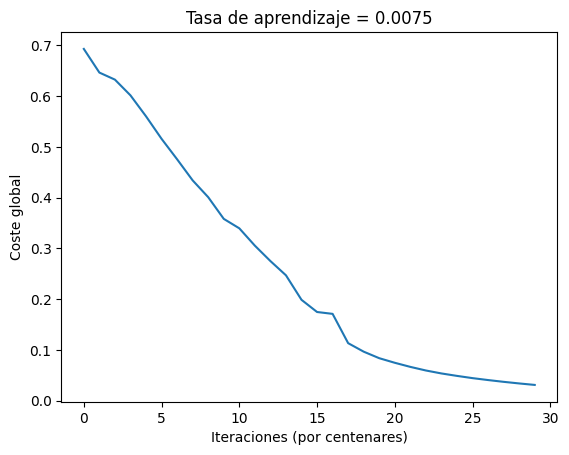

In [10]:
dibujar_costes(costes, tasa_aprendizaje)

Con los parámetros entrenados podemos clasificar las imágenes del conjunto de datos. Para comprobar las predicciones en los conjuntos de entrenamiento y test, utilizaremos la siguiente función:

In [11]:
def predecir(X, Y, parametros):
    """
    Esta función se utiliza para predecir los resultados de una red neuronal de L capas.
    
    Argumentos:
    X -- conjunto de datos de los ejemplos que desea etiquetar
    Y -- conjunto de etiquetas verdaderas
    parametros -- parametros del modelo entrenado
    
    Devuelve:
    predicciones -- predicciones para el conjunto de datos X dado
    """
    
    m = X.shape[1]
    # Numero de capas en la red neuronal
    n = len(parametros) // 2
    # Inicializamos el vector de predicciones
    predicciones = np.zeros((1,m))
    
    # Forward propagation
    salida, caches = propagacion_L_capas(X, parametros)
    
    # Convertir la salida en una prediccion 0/1
    for i in range(0, salida.shape[1]):
        if salida[0,i] > 0.5:
            predicciones[0,i] = 1
        else:
            predicciones[0,i] = 0
    
    # Mostrar las predicciones
    # print("Predicciones: " + str(predicciones))
    # print("Etiquetas verdaderas: " + str(Y))
    print(f'Precision: {100 * np.sum((predicciones == Y)/m)} %')
        
    return predicciones

Se utiliza la función `propagacion_L_capas()` para poder utilizar la función `predecir()` de forma común a todos los modelos que se puedan entrenar, dado que precisamente se creó esa función para ser compatible con todas las redes neuronales que sigan la estructura ReLU para las capas ocultas y sigmoide para la capa de salida.

Veamos qué tal las predicciones:

In [12]:
predicciones_entrenamiento = predecir(train_x, train_y, parametros)

Precision: 99.99999999999997 %


In [13]:
predicciones_test = predecir(test_x, test_y, parametros)

Precision: 72.0 %


La mejor opción para visualizar la precisión conseguida es la matriz de confusión, para lo cual nos valdremos de la biblioteca sklearn. Hay que convertir los datos en un array unidemensional para que funcione la función:

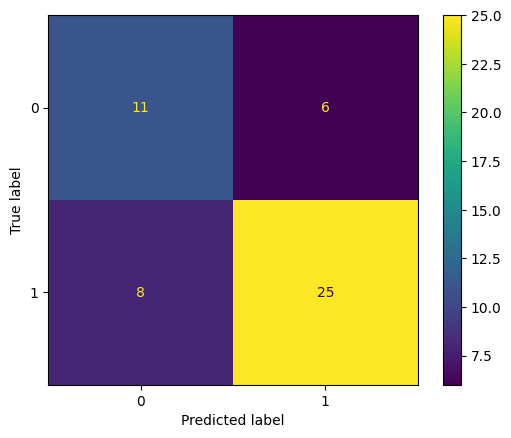

In [14]:
cm = confusion_matrix(np.squeeze(test_y.reshape(-1,1)), np.squeeze(predicciones_test.reshape(-1,1)))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

<a name='4-4'></a>
### 4.4 - Análisis de los resultados

Se ha mejorado el rendimiento/precisión en el conjunto test de un 70% con la regresión logística a un 72% con una red neuronal muy simple.

Sin embargo, el modelo sufre de **sobreajuste (_overfitting_)**. Esto sucede cuando el modelo se ajusta extremadamente bien a los datos, como bien indica esa precisión del 99% del conjunto de entrenamiento, y hay mucha disparidad entre la precisión del conjunto de entrenamiento y de prueba, como también sucede.

Posibles forma de abordar el sobreajuste:

- Recabar más datos de entrenamiento.
- Hacer selección de características.
- Reducir el tamaño de los parámetros mediante la técnica de regularización.

<a name='5'></a>
## 5 - Modelo de red neuronal con L capas (L-1 capas ocultas)

<a name='5-1'></a>
### 5.1 - Arquitectura del modelo

<u>Descripción</u>:
- Cada ejemplo de entrenamiento, $x^{(i)} = x$, es una imagen de dimensiones (64, 64, 4) reconvertida en un vecotr de dimensiones $(12288,1)$. 
- La matriz de entrada, $X = [x_0,x_1,...,x_{12287}]^T$, de dimensiones $(n_x, m) = (12288, 209)$, se multiplica por la matriz de pesos $W^{[1]}$ de dimensiones $(n_h^{[1]}, 12288)$ y se le añade el vector de sesgos, $b^{[1]}$. Esto se llama la unidad lineal.
- Se le aplica la activación _ReLU_ para obtener la matriz $A^{[1]} = [a_0^{[1]}, a_1^{[1]},..., a_{n_h^{[1]}-1}^{[1]}]^T$.
- Multiplicamos $A^{[1]}$ y $W^{[2]}$ y se le añade el sesgo, $b^{[2]}$.
- Este proceso se repite hasta $L - 1$ veces para cada $(W^{[l]}, b^{[l]})$.
- Por último, se aplica la activación sigmoide del resultado. Si su salida es mayor que 0.5, se clasifica como 1 (gato); sino, como 0.

Para representar una red neuronal de L capas se utiliza a continuación la representación simplificada (ver anexos):

<img src="imagenes/RN_L_capas.png" style="width:659px;height:477px;">
<caption><center><b>Figura 2</b>: Arquitectura de la red neuronal de L capas. <br> El modelo se puede resumir como una secuencia: Entrada -> [Ec. lineal -> ReLU] $\times$ (L-1) -> Ec. lineal -> Sigmoide -> Salida.</center></caption>

<a name='5-2'></a>
### 5.2 - Construcción del modelo

Se utilizarán las funciones implementadas en el archivo "Red_Neuronal_Profunda_paso_a_paso.ipynb", siguiendo la estructura *[LINEAL -> RELU]$\times$(L-1) -> LINEAL -> SIGMOIDE*. El orden de aplicación de las funciones es esencial y es el siguiente:

```python
def inicializacion_profunda(dims_capas):
    ...
    return parametros 
def propagacion_L_capas(X, parametros):
    ...
    return AL, caches
def calcular_coste(AL, Y):
    ...
    return coste
def retropropagacion_L_capas(AL, Y, caches):
    ...
    return gradientes
def actualizar_parametros(parametros_entrada, gradientes, tasa_aprendizaje):
    ...
    return parametros
```

In [15]:
# Constantes que definiran el modelo
# Red neuronal de cuatro capas (tres ocultas)
L_dims_capas = [12288, 20, 7, 5, 1] # dims_capas[0] = n_x = num_px * num_px * 3; dims_capas[-1] = n_y = 1 (clasificacion binaria)
tasa_aprendizaje_L = 0.0075

In [16]:
def modelo_L_capas(X, Y, dims_capas, tasa_aprendizaje = 0.0075, num_iteraciones = 3000, dibujar_coste=False):
    """
    Implementa una red neuronal de L capas: [LINEAL->RELU]*(L-1)->LINEAL->SIGMOIDE.
    
    Argumentos:
    X -- datos de entrada, de dimensiones (n_x, numero de ejemplos)
    Y -- vector de etiquetas verdaderas de dimensiones (1, numero de ejemplos)
    dims_capas -- lista que contiene los tamaños de la capa de entrada y el resto de capas.
                  Es decir, contiene L + 1 elementos, siendo L el numero de capas de la red 
                  (solo se cuentan ocultas y la de salida)
    tasa_aprendizaje -- tasa de aprendizaje de la regla de actualización de descenso de gradiente    
    num_iteraciones -- numero de iteraciones del bucle de optimización
    dibujar_coste -- si True, se imprimira el coste cada 100 iteraciones 
    
    Devuelve:
    parametros -- un diccionario que contiene los parametros hallados por el modelo; 
                  pueden utilizarse para hacer predicciones.
    """

    np.random.seed(1)
    # Lista para llevar registro de los costes
    costes = []
    
    # Inicializamos los parametros
    parametros = inicializacion_profunda(dims_capas)
    
    # Bucle que aplica el descenso del gradiente
    for i in range(0, num_iteraciones):
        
        # Forward propagation: [LINEAL -> RELU]*(L-1) -> LINEAL -> SIGMOIDE.
        AL, caches = propagacion_L_capas(X, parametros)

        # Calcular el coste
        coste = calcular_coste(AL, Y)
    
        # Backward propagation
        gradientes = retropropagacion_L_capas(AL, Y, caches)
 
        # Actualizacion de parametros
        parametros = actualizar_parametros(parametros, gradientes, tasa_aprendizaje)
                
        # Mostrar el coste cada 100 iteraciones de entrenamiento
        if dibujar_coste and i % 100 == 0 or i == num_iteraciones - 1:
            print("Coste tras cada iteración %i: %f" %(i, np.squeeze(coste)))
        if i % 100 == 0 or i == num_iteraciones:
            costes.append(coste)
    
    return parametros, costes

<a name='5-3'></a>
### 5.3 - Entrenamiento del modelo y predicción de resultados

Ejecutamos el modelo y veamos su rendimiento. Gracias a la vectorización, el tiempo de ejecución es menor que si no se hubiese implementado.

In [17]:
%%time
parametros_L, costes_L = modelo_L_capas(train_x, train_y, L_dims_capas, tasa_aprendizaje_L, dibujar_coste=True)

Coste tras cada iteración 0: 0.771749
Coste tras cada iteración 100: 0.672053
Coste tras cada iteración 200: 0.648263
Coste tras cada iteración 300: 0.611507
Coste tras cada iteración 400: 0.567047
Coste tras cada iteración 500: 0.540138
Coste tras cada iteración 600: 0.527930
Coste tras cada iteración 700: 0.465477
Coste tras cada iteración 800: 0.369126
Coste tras cada iteración 900: 0.391747
Coste tras cada iteración 1000: 0.315187
Coste tras cada iteración 1100: 0.272700
Coste tras cada iteración 1200: 0.237419
Coste tras cada iteración 1300: 0.199601
Coste tras cada iteración 1400: 0.189263
Coste tras cada iteración 1500: 0.161189
Coste tras cada iteración 1600: 0.148214
Coste tras cada iteración 1700: 0.137775
Coste tras cada iteración 1800: 0.129740
Coste tras cada iteración 1900: 0.121225
Coste tras cada iteración 2000: 0.113821
Coste tras cada iteración 2100: 0.107839
Coste tras cada iteración 2200: 0.102855
Coste tras cada iteración 2300: 0.100897
Coste tras cada iteración 24

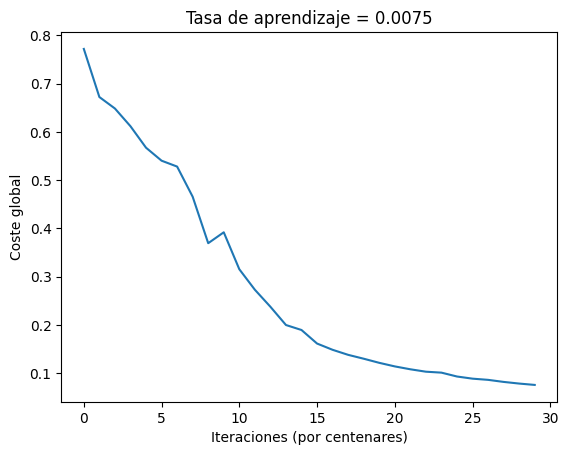

In [18]:
dibujar_costes(costes_L, tasa_aprendizaje_L)

Veamos qué tal las predicciones:

In [19]:
predicciones_entrenamiento_L = predecir(train_x, train_y, parametros_L)

Precision: 99.04306220095691 %


In [20]:
predicciones_test_L = predecir(test_x, test_y, parametros_L)

Precision: 82.0 %


Y la matriz de confusión para ver la distribución de aciertos y errores:

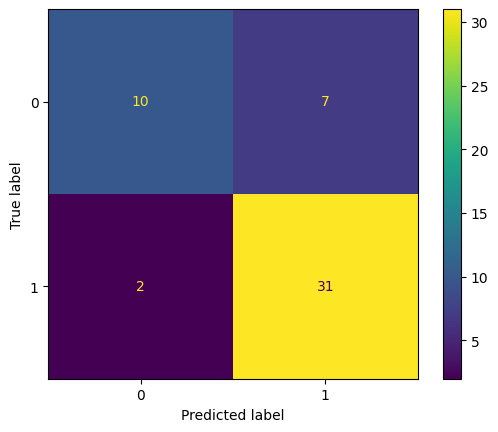

In [21]:
cm = confusion_matrix(np.squeeze(test_y.reshape(-1,1)), np.squeeze(predicciones_test_L.reshape(-1,1)))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

<a name='5-4'></a>
### 5.4 - Análisis de los resultados

Se mejorado mucho el resultado con este modelo de cuatro capas con respecto al modelo anterior de solo dos, pasando de un 72% de precisión en el conjunto test a un 82%. Donde más se falla es con los falsos positivos.

Viendo los costes globales finales de ambos modelos de red neuronal, es un claro ejemplo de que un coste global más bajo (el modelo de 2 capas) no implica necesariamente un modelo que haga mejores predicciones. A este modelo también se aplican los comentarios realizamos en [4.4 - Análisis de los resultados](#4-4) sobre el _overfitting_.

El siguiente paso, que sería casi otro trabajo en sí mismo, sería ajustar el modelo para obtener una mayor precisión en el conjunto test. Esto se conseguiría buscando sistemáticamente mejores hiperparámetros: _dims\_capas, tasa_aprendizaje o num\_iteraciones_, entre otros. Por ejemplo:
- Variar la tasa de aprendizaje y el número de iteraciones
- Probar diferentes métodos de inicialización.
- Probar otros preprocesamientos (centrar los datos, dividir cada fila por su desviación estándar, etc)
- ...

Hagamos una prueba variando la tasa de aprendizaje y probemos con más capas y neuronas para ver si ello mejora el resultado:

In [22]:
%%time
L_dims_capas_2 = [12288, 20, 11, 7, 5, 1]
tasa_aprendizaje_L_2 = 0.01
parametros_L_2, costes_L_2 = modelo_L_capas(train_x, train_y, L_dims_capas_2, tasa_aprendizaje_L_2, dibujar_coste=True)

Coste tras cada iteración 0: 0.688814
Coste tras cada iteración 100: 0.633277
Coste tras cada iteración 200: 0.588099
Coste tras cada iteración 300: 0.534839
Coste tras cada iteración 400: 0.498107
Coste tras cada iteración 500: 0.456732
Coste tras cada iteración 600: 0.390353
Coste tras cada iteración 700: 0.339371
Coste tras cada iteración 800: 0.290796
Coste tras cada iteración 900: 0.281094
Coste tras cada iteración 1000: 0.246153
Coste tras cada iteración 1100: 0.181659
Coste tras cada iteración 1200: 0.160107
Coste tras cada iteración 1300: 0.679016
Coste tras cada iteración 1400: 0.476588
Coste tras cada iteración 1500: 0.529653
Coste tras cada iteración 1600: 0.203168
Coste tras cada iteración 1700: 0.137258
Coste tras cada iteración 1800: 0.125630
Coste tras cada iteración 1900: 0.101357
Coste tras cada iteración 2000: 0.103116
Coste tras cada iteración 2100: 0.317165
Coste tras cada iteración 2200: 0.283812
Coste tras cada iteración 2300: 0.098502
Coste tras cada iteración 24

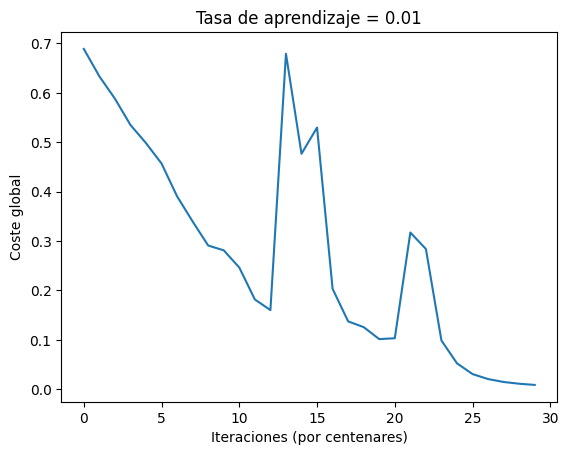

In [23]:
dibujar_costes(costes_L_2, tasa_aprendizaje_L_2)

In [24]:
predicciones_entrenamiento_L_2 = predecir(train_x, train_y, parametros_L_2)

Precision: 99.99999999999997 %


In [25]:
predicciones_test_L_2 = predecir(test_x, test_y, parametros_L_2)

Precision: 74.0 %


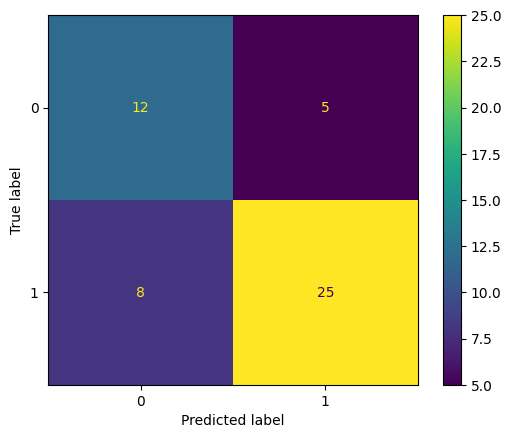

In [26]:
cm = confusion_matrix(np.squeeze(test_y.reshape(-1,1)), np.squeeze(predicciones_test_L_2.reshape(-1,1)))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

cm_display.plot()
plt.show()

Empeoramos resultados. Aumentar las capas y número de neuronas (pasar de 4 a 5 capas en este caso) no es siempre necesariamente mejor.

Vemos que un coste global menor no implica necesariamente que el modelo mejora la predicción en el conjunto test. Indica cómo de bien hemos ajustado el modelo a nuestro conjunto de entrenamiento. En este caso, hemos mejorado con respecto al primer ejemplo de 4 capas, que era un 99.04%, al 99,99%. Pero se ha empeorado en lo importante, el conjunto test, que ha bajado de un 82% de acierto a un 74%. Los modelos grandes (con más unidades ocultas) son capaces de ajustarse mejor al conjunto de entrenamiento, hasta que finalmente los modelos más grandes sobreajustan (_overfitting_) los datos.

Vemos que una tasa de aprendizaje de 0.01 casi diverge, por lo que la tasa inicial, 0.0075, es una tasa de aprendizaje bastante óptima para este problema.

<a name='6'></a>
##  6 - Comentarios finales

Analizada la métrica principal elegida, veamos las imágenes que el modelo de L-capas clasifica incorrectamente. Para ello definimos la siguiente función:

In [27]:
def mostrar_clasificacion_incorrecta(clases, X_test, Y_test, prediccion):
    """
    Muestra imagenes donde la prediccion fue incorrecta.
    clases - listado de clases (clasificacion binaria en este caso, cat / non-cat)
    X_test -- conjunto test
    Y_test -- etiquetas verdaderas del conjunto test
    prediccion - prediccion realizada por el modelo de L-capas
    """
    # Las predicciones correctas son aquellas que coinciden con Y_test. Posibilidades correcta: 0-0, 1-1. Incorrectas: 0-1, 1-0
    # Es decir, si la suma de prediccion mas etiqueta es 1, es que la prediccion es incorrecta:
    suma = prediccion + Y_test
    indices_mal_etiquetados = np.asarray(np.where(suma == 1))
    # Tamaño por defecto de los plots
    plt.rcParams['figure.figsize'] = (40.0, 40.0)
    num_img_mal_etiquetadas = len(indices_mal_etiquetados[0])
    print(f'Número de imágenes mal clasificadas: {num_img_mal_etiquetadas}. Total de imágenes: {Y_test.shape[1]}')
    for i in range(num_img_mal_etiquetadas):
        indice = indices_mal_etiquetados[1][i]
        plt.subplot(2, num_img_mal_etiquetadas, i + 1)
        plt.imshow(X_test[:,indice].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Predicción: " + clases[int(prediccion[0,indice])].decode("utf-8") + " \n Clase: " + clases[Y_test[0,indice]].decode("utf-8"))

Número de imágenes mal clasificadas: 9. Total de imágenes: 50


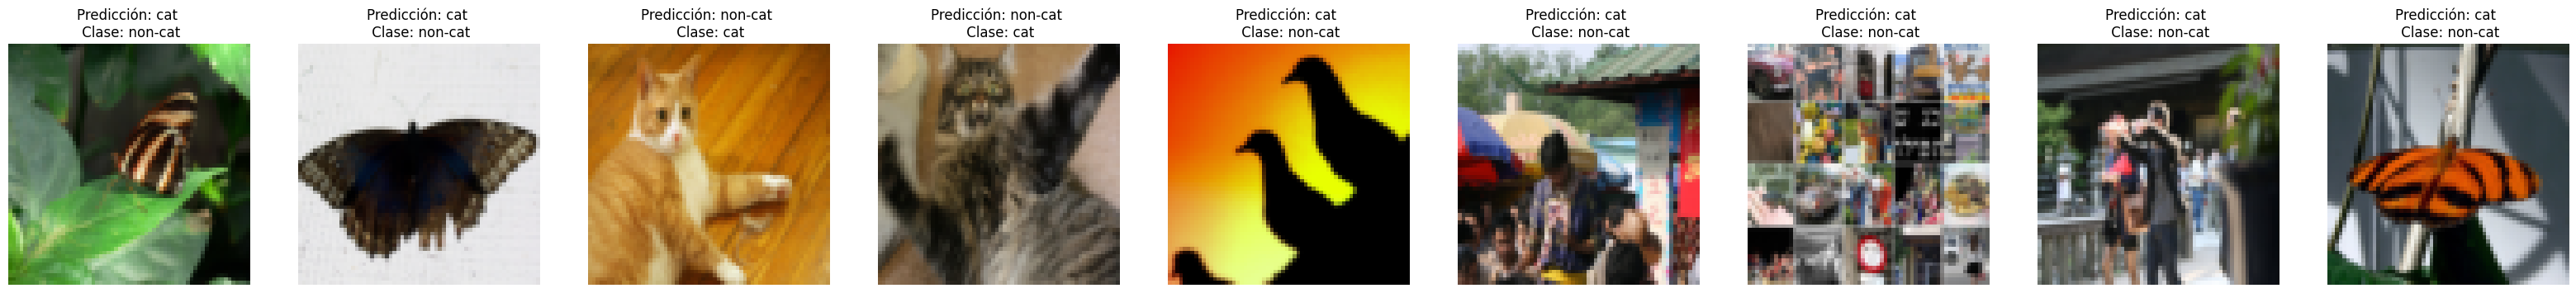

In [28]:
mostrar_clasificacion_incorrecta(clases, test_x, test_y, predicciones_test_L)

**Algunos tipos de imágenes en las que el modelo tiende a obtener malos resultados son:** 
- Cuerpo del gato en una posición inusual.
- El gato aparece sobre un fondo de color similar.
- Color y especie de gato inusuales.
- Ángulo de la cámara.
- Brillo de la imagen.
- Variación de escala (el gato aparece muy grande o muy pequeño en la imagen).

Como recordatorio final, el objetivo de este trabajo no es entrenar un modelo de red neuronal perfectamente ajustado al conjunto de datos, sino explicar su proceso de creación y cómo funcionan. Con el código creado como base, se podría ajustar los algoritmos e hiperparámetros para mejorar esta red neuronal. Pero eso ya sería otro trabajo de fin de master en sí mismo.